# Experiment 0-A

This experiment used 344 texts scraped from JSTOR, of which 220 had text matches. 

In [1]:
import pandas as pd
%matplotlib inline
from ast import literal_eval
import numpy as np
import re
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [16, 6]

In [2]:
df = pd.read_csv('e0a/log.txt')

In [3]:
def getDate(filename): 
    """
    Extract dates from filenames. 
    """
    m = re.search('_(\d{4})_', filename)
    if m is not None: 
        return int(m.group(1))
    else:
        return None

df['Date'] = df['Text B'].apply(getDate)
df['Decade'] = df['Date'] - (df['Date'] % 10)

In [4]:
df.head()

,Text A,Text B,Threshold,N-Grams,Num Matches,Text A Length,Text B Length,Locations in A,Locations in B,Date,Decade
0,middlemarch.txt,txt/Nunokawa_1993_The Miser's Two Bodies.pdf.txt,2,3,2,1793446,62029,"[(1662476, 1662946), (1712058, 1712098)]","[(8779, 9249), (32760, 32797)]",1993.0,1990.0
1,middlemarch.txt,txt/Staten_2000_Is Middlemarch Ahistorical.pdf...,2,3,3,1793446,66758,"[(313509, 313801), (739656, 739671), (739694, ...","[(40984, 41278), (42171, 42186), (42350, 42459)]",2000.0,2000.0
2,middlemarch.txt,txt/Deery_1985_Margaret Fuller and Dorothea Br...,2,3,6,1793446,21765,"[(47018, 47035), (68821, 68901), (95818, 95853...","[(7697, 7718), (8515, 8596), (8705, 8740), (92...",1985.0,1980.0
3,middlemarch.txt,txt/McGeer_2004_The Art of Good Hope.pdf.txt,2,3,5,1793446,56683,"[(42704, 42735), (527924, 527947), (1326632, 1...","[(20849, 20880), (24073, 24096), (26993, 27130...",2004.0,2000.0
4,middlemarch.txt,txt/HAWES_1992_GEORGE ELIOTS SAYINGS.pdf.txt,2,3,1,1793446,13767,"[(1327591, 1327734)]","[(6577, 6720)]",1992.0,1990.0


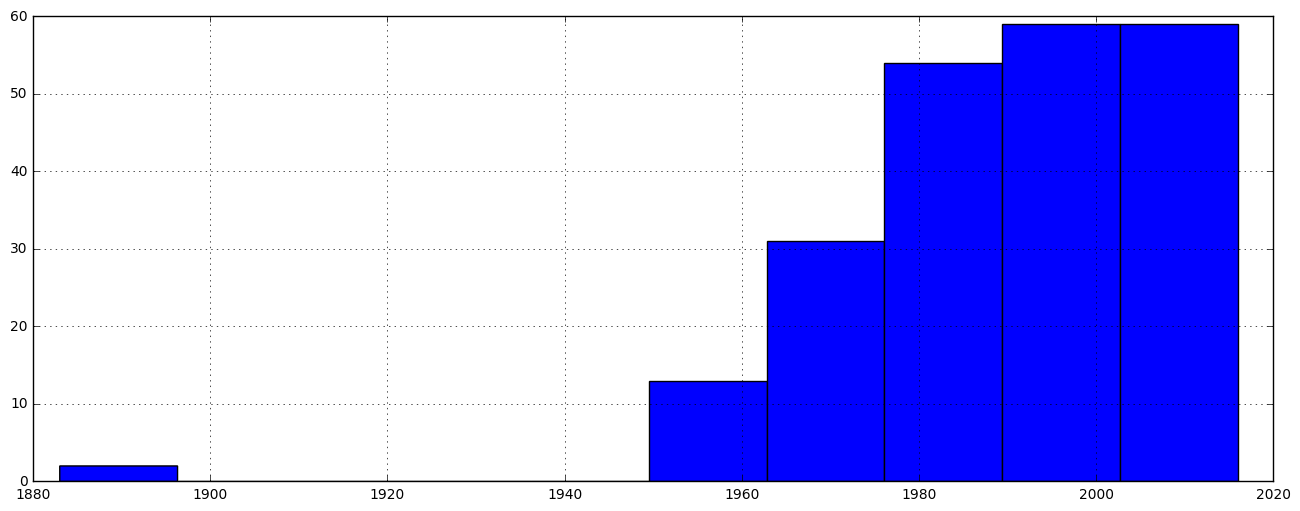

In [5]:
df['Date'].hist()

In [6]:
textALength = df['Text A Length'][0]
textALength

1793446

In [7]:
decades = np.arange(1930, 2020, 10)

In [8]:
# Make a dictionary of decades. 
# Values are a list of locations.  
decadeDict = {}
for i, row in df.iterrows():
    decade = row['Decade']
    locations = literal_eval(row['Locations in A'])
    if decade not in decadeDict: 
        decadeDict[decade] = locations
    else: 
        decadeDict[decade] += locations 

In [9]:
# Grab the beginnings of quotes. 
decadeStarts = {decade: [item[0] for item in loc] for decade, loc in decadeDict.items()}

In [22]:
decadesBinned = {decade: 
                 np.histogram(locations, bins=50, range=(0, textALength))[0]
                 for decade, locations in decadeStarts.items() if decade in decades}

In [23]:
decadesDF = pd.DataFrame(decadesBinned).T

In [24]:
decadesDF

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1950.0,5,3,0,2,0,0,0,0,0,0,...,0,0,1,4,0,1,0,44,4,2
1960.0,7,0,1,1,0,1,0,0,8,2,...,4,0,0,6,0,4,1,33,2,4
1970.0,39,14,2,13,6,1,2,0,5,13,...,0,0,1,2,7,1,1,12,1,17
1980.0,30,18,7,5,3,6,6,9,22,12,...,0,0,0,8,3,10,1,18,3,12
1990.0,35,11,9,14,2,15,2,10,37,9,...,0,2,3,1,8,2,15,27,6,15
2000.0,40,12,10,0,18,9,0,7,6,8,...,0,5,6,3,3,3,7,7,4,7
2010.0,45,5,4,1,11,0,2,1,7,5,...,2,0,1,4,6,3,7,5,1,20


In [25]:
ylabels = [str(int(decade)) for decade in decadesDF.index] + ['2020']

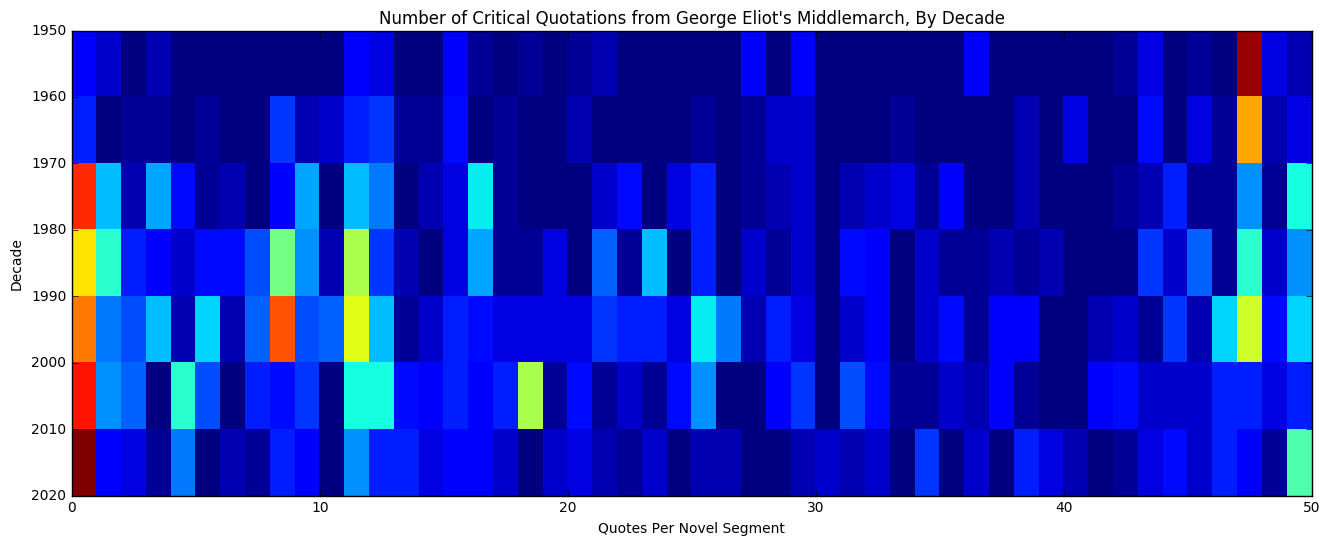

In [26]:
plt.pcolor(decadesDF)
plt.yticks(np.arange(len(decadesDF.index)+1), ylabels)
plt.gca().invert_yaxis()
plt.ylabel('Decade')
plt.xlabel('Quotes Per Novel Segment')
plt.title("Number of Critical Quotations from George Eliot's Middlemarch, By Decade")
#plt.xticks(np.arange(len(decadesDF.columns)), decadesDF.columns)
plt.show()

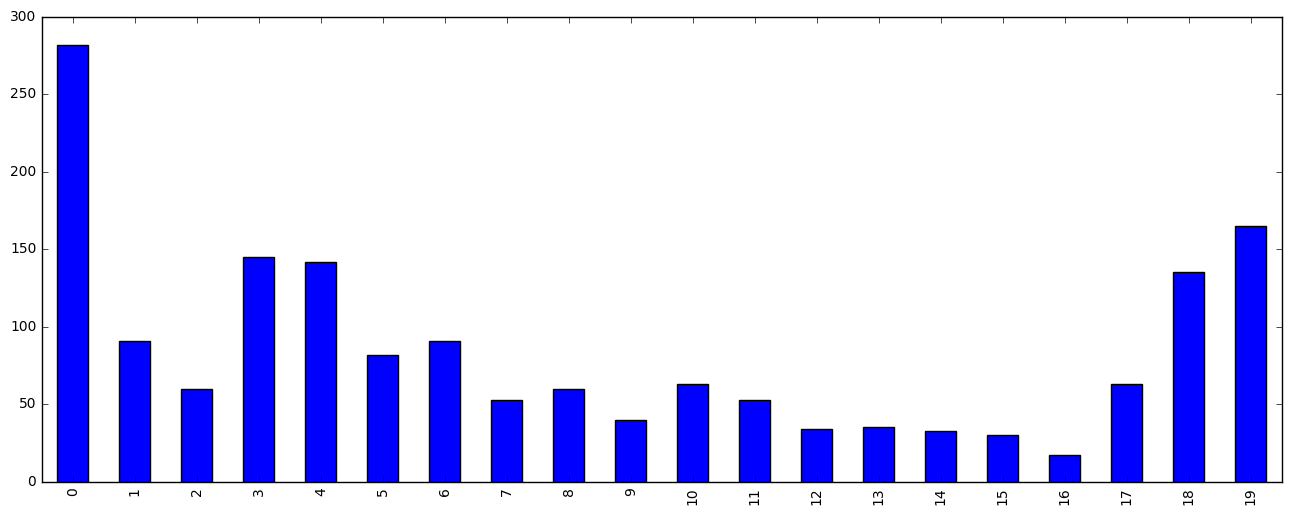

In [21]:
decadesDF.sum().plot(kind='bar')